# 基本设置

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 零电流法、补偿法测遏止电压

In [2]:
x = np.array([8.214, 7.408, 6.879, 5.480, 5.196])
y_1 = np.array([1.724,1.496,1.178,0.612,0.494])
y_2 = np.array([1.730,1.502,1.180,0.614,0.498])

## 光电流 - 光阑直径数据：

In [3]:
x = np.array([14.35, 8, 4, 2])
y_1 = np.array([406.0, 117.5, 28.0, 8.2])
y_2 = np.array([31.1, 8.2, 1.8, 0.5])
# p_1 = np.polyfit(np.log(x), np.log(y_1), 1)
# p_2 = np.polyfit(np.log(x), np.log(y_2), 1)

## 光电流 - 光源距离 数据：

In [4]:
x = np.array([400, 380, 360, 340, 320, 300])
y_1 = np.array([29.2, 34.1, 39.4, 46.9, 56.0, 67.5])
y_2 = np.array([19.2, 22.4, 26.1, 31.7, 38.4, 45.8])

## 线性分析方法：

In [5]:
p_1 = np.polyfit(x, y_1, 1)
p_2 = np.polyfit(x, y_2, 1)
print(p_1, p_2)

[ -0.37814286 177.86666667] [ -0.26657143 123.9       ]


### Log回归（转为线性回归）：

In [6]:
pn1 = np.polyfit(np.log(x), np.log(y_1), 1)
pn2 = np.polyfit(np.log(x), np.log(y_2), 1)
print(pn1, pn2)

[-2.91031661 20.81158729] [-3.06161567 21.29579989]


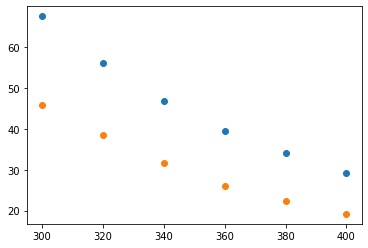

In [7]:
plt.scatter(x, y_1)
plt.scatter(x, y_2)

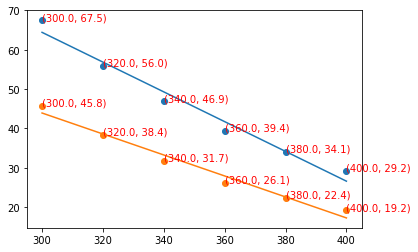

In [8]:
plt.scatter(x, y_1)
plt.scatter(x, y_2)
plt.plot(x, x * p_1[0] + p_1[1])
plt.plot(x, x * p_2[0] + p_2[1])
for i in range(len(x)):
    plt.text(x[i], y_1[i], ((x[i] * 1000) // 1 / 1000, (y_1[i] * 1000) // 1 / 1000),
             color='red')
    plt.text(x[i], y_2[i], ((x[i] * 1000) // 1 / 1000, (y_2[i] * 1000) // 1 / 1000),
             color='red')

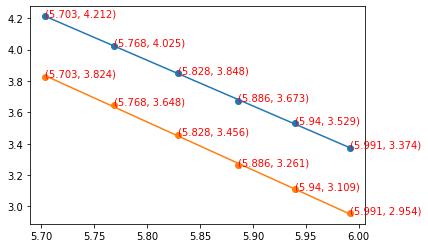

In [9]:
plt.scatter(np.log(x), np.log(y_1))
plt.scatter(np.log(x), np.log(y_2))

plt.plot(np.log(x), np.log(x) * pn1[0] + pn1[1])
plt.plot(np.log(x), np.log(x) * pn2[0] + pn2[1])
for i in range(len(x)):
    plt.text(np.log(x[i]), np.log(y_1[i]), ((np.log(x[i]) * 1000) // 1 / 1000, (np.log(y_1[i]) * 1000) // 1 / 1000),
             color='red')
    plt.text(np.log(x[i]), np.log(y_2[i]), ((np.log(x[i]) * 1000) // 1 / 1000, (np.log(y_2[i]) * 1000) // 1 / 1000),
             color='red')

## 伏安特性曲线数据：


In [10]:
t_1 = np.array(
    [-1.998, -1.96, -1.92, -1.88, -1.84, -1.8, -1.76, -1.72, -1.68, -1.64, -1.6, -1.56, -1.52, -1.48, -1.44, -1.4,
     -1.36, -1.32, -1.28, -1.24, -1.2, -1.16, -1.12, -1.08, -1.04, -1, -0.96, -0.92, -0.88, -0.84, -0.8, -0.76, -0.72,
     -0.68, -0.64, -0.6, -0.56, -0.52, -0.48, -0.44, -0.4, -0.36, -0.32, -0.28, -0.24, -0.2, -0.16, -0.12, -0.08, -0.04,
     0])
data_12 = np.array(
    [-1.88, -1.88, -1.85, -1.88, -1.76, -1.72, -1.63, -1.54, -1.45, -1.32, -1.14, -0.92, -0.72, -0.33, 0.03, 0.48, 1.08,
     1.85, 2.86, 4.16, 6, 8.2, 10.7, 13.6, 16.8, 19.9, 23, 26.1, 28.8, 32.3, 35.6, 38.4, 41.6, 45.2, 47.9, 51.1, 53.7,
     57.6, 60.3, 63.3, 68, 70.5, 73.6, 77.2, 81.2, 85, 87.6, 91.4, 94.2, 97.3, 100.8])
data_13 = np.array(
    [-3.6, -3.6, -3.5, -3.4, -3.4, -3.4, -3.4, -3.3, -3.3, -3.2, -3.2, -3.1, -3.1, -3.1, -2.9, -2.8, -2.7, -2.5, -2.2,
     -2, -1.5, -0.8, 0.3, 2.2, 4.9, 9, 14.5, 20.8, 27.6, 34.3, 40.7, 47, 54.1, 61.1, 68, 74.1, 80.1, 86.2, 91.6, 96.7,
     103.3, 107.9, 114.4, 120.3, 125.7, 131.3, 138.2, 143.9, 148.5, 154.3, 160.8])
data_11 = np.array(
    [-28, -25.6, -24, -22.3, -20.3, -18.3, -15.8, -12.4, -7.3, 0.6, 12.6, 29.3, 49.7, 72.5, 99.4, 131.7, 168.7, 209,
     256, 306, 359, 407, 455, 502, 547, 608, 646, 694, 743, 789, 828, 863, 901, 943, 996, 1049, 1073, 1114, 1163, 1211,
     1263, 1303, 1353, 1393, 1452, 1509, 1552, 1606, 1666, 1724, 1781]) / 10
data_15 = np.array(
    [-4, -3.9, -3.9, -3.9, -3.7, -3.8, -3.8, -3.7, -3.8, -3.9, -3.9, -3.8, -3.9, -3.8, -3.7, -3.7, -3.7, -3.8, -3.8,
     -3.9, -3.8, -3.6, -3.6, -3.4, -3.6, -3.5, -3.5, -3.6, -3.6, -3.5, -3.6, -3.6, -3.5, -3.4, -3.3, -3.2, -3.2, -3.1,
     -2.4, -0.9, 1.9, 6, 12.4, 19.9, 28.5, 36.5, 44.8, 53.2, 58.7, 68.2, 74.4]) / 10
data_14 = np.array(
    [-5.4, -5.3, -5.2, -5.1, -5.3, -5.2, -5.3, -5.2, -5.1, -5, -5, -5.1, -5.1, -5.1, -5.2, -5.1, -5, -5, -4.9, -5, -5.1,
     -5.1, -5, -5.1, -4.9, -4.9, -4.8, -4.8, -4.7, -4.8, -4.8, -4.8, -4.6, -4.4, -4.2, -3.5, -2.1, 1.6, 7.7, 15.5, 24.8,
     34.8, 45.9, 56.9, 68.1, 80.6, 93.5, 104, 110.5, 122.4, 135.3]) / 10

In [11]:
t_2 = np.array(
    [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
     30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
data_21 = np.array(
    [7, 8, 35, 51, 61, 73, 84, 93, 102, 114, 125, 138, 149, 161, 170, 181, 190, 198, 205, 213, 222, 231, 238, 245, 262,
     259, 266, 274, 278, 284, 288, 295, 298, 302, 307, 313, 316, 316, 319, 320, 325, 326, 329, 323, 328, 341, 346, 345,
     346, 345, 348, 351]) * 10
data_22 = np.array(
    [0, 21, 104, 215, 292, 359, 437, 502, 560, 613, 670, 730, 788, 850, 912, 975, 1025, 1083, 1193, 1170, 1208, 1259,
     1307, 1346, 1404, 1427, 1481, 1507, 1552, 1566, 1597, 1620, 1660, 1675, 1695, 1723, 1739, 1765, 1773, 1792, 1818,
     1816, 1836, 1870, 1858, 1893, 1886, 1916, 1904, 1914, 1924, 1946])
data_23 = np.array(
    [0, 4, 19, 35, 46, 58, 68, 79, 88, 97, 107, 114, 122, 130, 141, 148, 159, 165, 174, 179, 187, 193, 200, 207, 211,
     218, 222, 227, 232, 233, 240, 240, 244, 247, 250, 253, 256, 258, 263, 263, 266, 268, 269, 274, 273, 274, 278, 278,
     281, 280, 283, 284]) * 10
data_24 = np.array(
    [0, 0, 14, 28, 43, 56, 65, 74, 82, 88, 94, 102, 107, 113, 120, 126, 132, 136, 141, 144, 149, 151, 154, 158, 161,
     165, 166, 169, 170, 172, 175, 177, 180, 180, 182, 184, 184, 188, 188, 190, 191, 193, 195, 196, 196, 197, 198, 200,
     201, 201, 202, 202])
data_25 = np.array(
    [0, 0, 1, 13, 28, 38, 46, 52, 56, 59, 62, 67, 69, 73, 77, 80, 84, 86, 89, 91, 93, 94, 97, 99, 100, 103, 103, 105,
     106, 107, 108, 110, 111, 110, 111, 113, 113, 113, 114, 115, 116, 116, 117, 117, 118, 118, 119, 120, 121, 121, 121,
     122])

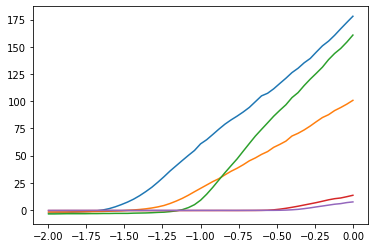

In [12]:
plt.plot(t_1, data_11)  # blue
plt.plot(t_1, data_12)  # orange
plt.plot(t_1, data_13)  # green
plt.plot(t_1, data_14)  # red
plt.plot(t_1, data_15)  #purple
plt.savefig('export.jpg', bbox_inches='tight', dpi=1000)

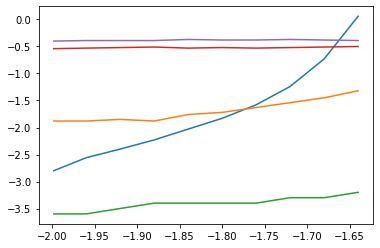

In [13]:
plt.plot(t_1[0:10], data_11[0:10])  # blue
plt.plot(t_1[0:10], data_12[0:10])  # orange
plt.plot(t_1[0:10], data_13[0:10])  # green
plt.plot(t_1[0:10], data_14[0:10])  # red
plt.plot(t_1[0:10], data_15[0:10])  #purple

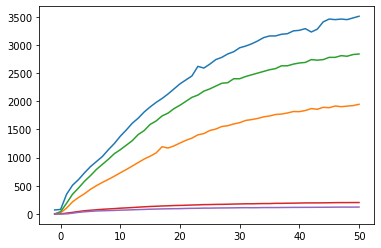

In [14]:
plt.plot(t_2, data_21)  # blue
plt.plot(t_2, data_22)  # orange
plt.plot(t_2, data_23)  # green
plt.plot(t_2, data_24)  # red
plt.plot(t_2, data_25)  #purple
plt.savefig('export2.jpg', bbox_inches='tight', dpi=1000)

In [35]:
t = np.append(t_1, t_2[2:])
k = np.argsort(t)
t = t[k]
data_1 = np.append(data_11, data_21[2:])[k]
data_2 = np.append(data_12, data_22[2:])[k]
data_3 = np.append(data_13, data_23[2:])[k]
data_4 = np.append(data_14, data_24[2:])[k]
data_5 = np.append(data_15, data_25[2:])[k]

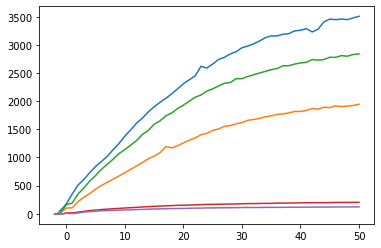

In [16]:
plt.plot(t,data_1)
plt.plot(t,data_2)
plt.plot(t,data_3)
plt.plot(t,data_4)
plt.plot(t,data_5)
plt.savefig('export5.jpg', bbox_inches='tight', dpi=1000)

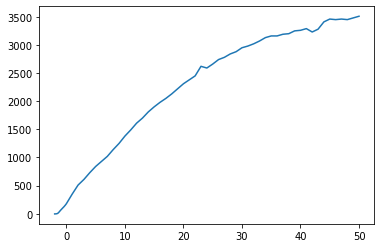

In [17]:
# testFit = np.polyfit(t,data_1,3)
# print(testFit)
t = np.append(t_1[::5], t_2[2:])
k = np.argsort(t)
t = t[k]
data_test = np.append(data_11[::5], data_21[2:])[k]
plt.plot(t,data_test)
# plt.scatter(t, data_test, s=1.5,c='red',zorder=2.5)
plt.savefig('export3.jpg', bbox_inches='tight', dpi=1000)

### 单个数据分析

In [18]:
fit_1 = np.polyfit(t,data_1,2)
print(fit_1)
fit_1_func = np.poly1d(fit_1)
plt.scatter(t,data_1, c='red', zorder=2.5, s=1)
plt.plot(t,fit_1_func(t))
plt.savefig('export6.jpg', bbox_inches='tight', dpi=1000)

TypeError: expected x and y to have same length

[   -73.8543718    -776.09069324  -3408.64157064  -8108.77243824
 -11348.7322618   -9550.21781362  -4762.42719176  -1311.01041559
   -129.95088738    140.31609589    178.10347647]
[  -738.543718    -6984.81623919 -27269.13256513 -56761.40706766
 -68092.39357081 -47751.08906812 -19049.70876705  -3933.03124677
   -259.90177476    140.31609589]
[-6.64689346e+03 -5.58785299e+04 -1.90883928e+05 -3.40568442e+05
 -3.40461968e+05 -1.91004356e+05 -5.71491263e+04 -7.86606249e+03
 -2.59901775e+02]
[-1.96386645+0.04081512j -1.96386645-0.04081512j -1.8707633 +0.j
 -1.13607341+0.j         -0.7268974 +0.j         -0.34937116+0.13782057j
 -0.34937116-0.13782057j -0.0465043 +0.j        ]
[-2.800e+00 -2.560e+00 -2.400e+00 -2.230e+00 -2.030e+00 -1.830e+00
 -1.580e+00 -1.240e+00 -7.300e-01  6.000e-02  1.260e+00  2.930e+00
  4.970e+00  7.250e+00  9.940e+00  1.317e+01  1.687e+01  2.090e+01
  2.560e+01  3.060e+01  3.590e+01  4.070e+01  4.550e+01  5.020e+01
  5.470e+01  6.080e+01  6.460e+01  6.940e+01  7.430e

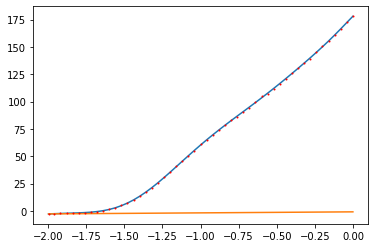

In [20]:
fit_11 = np.polyfit(t_1,data_11,10)
print(fit_11)
print(np.polyder(fit_11))
print(np.polyder(np.polyder(fit_11)))
print(np.roots(np.polyder(np.polyder(fit_11))))
# print(t)
print(data_11)
fit_11_2 = np.polyfit(t[:4],data_11[:4],1)
# print(fit_11_2)
fit_11_func = np.poly1d(fit_11)
fit_11_2_func = np.poly1d(fit_11_2)
plt.scatter(t_1,data_11, c='red', zorder=2.5, s=1)
plt.plot(t_1,fit_11_func(t_1))
plt.plot(t_1,fit_11_2_func(t_1))
# plt.savefig('export7.jpg', bbox_inches='tight', dpi=1000)

In [21]:
data_11_fixed = data_11 - fit_11_2_func(t_1)
print(np.dstack((t_1,data_11)))

[[[-1.998e+00 -2.800e+00]
  [-1.960e+00 -2.560e+00]
  [-1.920e+00 -2.400e+00]
  [-1.880e+00 -2.230e+00]
  [-1.840e+00 -2.030e+00]
  [-1.800e+00 -1.830e+00]
  [-1.760e+00 -1.580e+00]
  [-1.720e+00 -1.240e+00]
  [-1.680e+00 -7.300e-01]
  [-1.640e+00  6.000e-02]
  [-1.600e+00  1.260e+00]
  [-1.560e+00  2.930e+00]
  [-1.520e+00  4.970e+00]
  [-1.480e+00  7.250e+00]
  [-1.440e+00  9.940e+00]
  [-1.400e+00  1.317e+01]
  [-1.360e+00  1.687e+01]
  [-1.320e+00  2.090e+01]
  [-1.280e+00  2.560e+01]
  [-1.240e+00  3.060e+01]
  [-1.200e+00  3.590e+01]
  [-1.160e+00  4.070e+01]
  [-1.120e+00  4.550e+01]
  [-1.080e+00  5.020e+01]
  [-1.040e+00  5.470e+01]
  [-1.000e+00  6.080e+01]
  [-9.600e-01  6.460e+01]
  [-9.200e-01  6.940e+01]
  [-8.800e-01  7.430e+01]
  [-8.400e-01  7.890e+01]
  [-8.000e-01  8.280e+01]
  [-7.600e-01  8.630e+01]
  [-7.200e-01  9.010e+01]
  [-6.800e-01  9.430e+01]
  [-6.400e-01  9.960e+01]
  [-6.000e-01  1.049e+02]
  [-5.600e-01  1.073e+02]
  [-5.200e-01  1.114e+02]
  [-4.800e-0

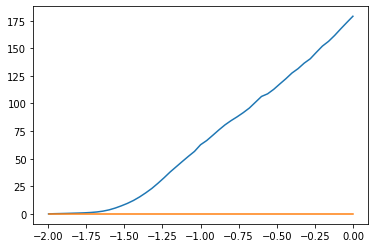

In [22]:
plt.plot(t_1,data_11_fixed)
plt.plot(t_1,[0]*51)

In [23]:
7.3e-1/((6.0e-2 + 7.3e-1)/0.04) -1.68

-1.6430379746835442

### 总体分析

[-1.96386645+0.04081512j -1.96386645-0.04081512j -1.8707633 +0.j
 -1.13607341+0.j         -0.7268974 +0.j         -0.34937116+0.13782057j
 -0.34937116-0.13782057j -0.0465043 +0.j        ]
[[[-1.998e+00 -2.800e+00]
  [-1.960e+00 -2.560e+00]
  [-1.920e+00 -2.400e+00]
  [-1.880e+00 -2.230e+00]
  [-1.840e+00 -2.030e+00]
  [-1.800e+00 -1.830e+00]
  [-1.760e+00 -1.580e+00]
  [-1.720e+00 -1.240e+00]
  [-1.680e+00 -7.300e-01]
  [-1.640e+00  6.000e-02]
  [-1.600e+00  1.260e+00]
  [-1.560e+00  2.930e+00]
  [-1.520e+00  4.970e+00]
  [-1.480e+00  7.250e+00]
  [-1.440e+00  9.940e+00]
  [-1.400e+00  1.317e+01]
  [-1.360e+00  1.687e+01]
  [-1.320e+00  2.090e+01]
  [-1.280e+00  2.560e+01]
  [-1.240e+00  3.060e+01]
  [-1.200e+00  3.590e+01]
  [-1.160e+00  4.070e+01]
  [-1.120e+00  4.550e+01]
  [-1.080e+00  5.020e+01]
  [-1.040e+00  5.470e+01]
  [-1.000e+00  6.080e+01]
  [-9.600e-01  6.460e+01]
  [-9.200e-01  6.940e+01]
  [-8.800e-01  7.430e+01]
  [-8.400e-01  7.890e+01]
  [-8.000e-01  8.280e+01]
  [-7.

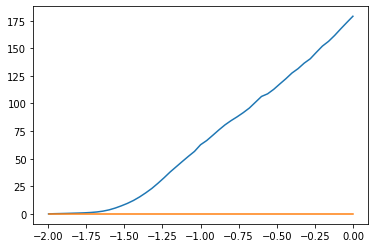

In [24]:
fit_11 = np.polyfit(t_1,data_11,10)
print(np.roots(np.polyder(np.polyder(fit_11)))) # 拐点可能的位置
print(np.dstack((t_1,data_11)))
fit_11_2 = np.polyfit(t[:4],data_11[:4],1) # 切割拐点
fit_11_func = np.poly1d(fit_11)
fit_11_2_func = np.poly1d(fit_11_2)
data_11_fixed = data_11 - fit_11_2_func(t_1) # 修正结果
# plt.scatter(t_1,data_11, c='red', zorder=2.5, s=1)
plt.plot(t_1,data_11_fixed)
plt.plot(t_1,[0]*51)
print(np.dstack((t_1,data_11_fixed)))

[ 1.30018225 -1.90752156 -1.71423696 -1.56200834 -0.89538372 -0.64253968
 -0.30087693 -0.08018471]
[[[-1.998e+00 -1.880e+00]
  [-1.960e+00 -1.880e+00]
  [-1.920e+00 -1.850e+00]
  [-1.880e+00 -1.880e+00]
  [-1.840e+00 -1.760e+00]
  [-1.800e+00 -1.720e+00]
  [-1.760e+00 -1.630e+00]
  [-1.720e+00 -1.540e+00]
  [-1.680e+00 -1.450e+00]
  [-1.640e+00 -1.320e+00]
  [-1.600e+00 -1.140e+00]
  [-1.560e+00 -9.200e-01]
  [-1.520e+00 -7.200e-01]
  [-1.480e+00 -3.300e-01]
  [-1.440e+00  3.000e-02]
  [-1.400e+00  4.800e-01]
  [-1.360e+00  1.080e+00]
  [-1.320e+00  1.850e+00]
  [-1.280e+00  2.860e+00]
  [-1.240e+00  4.160e+00]
  [-1.200e+00  6.000e+00]
  [-1.160e+00  8.200e+00]
  [-1.120e+00  1.070e+01]
  [-1.080e+00  1.360e+01]
  [-1.040e+00  1.680e+01]
  [-1.000e+00  1.990e+01]
  [-9.600e-01  2.300e+01]
  [-9.200e-01  2.610e+01]
  [-8.800e-01  2.880e+01]
  [-8.400e-01  3.230e+01]
  [-8.000e-01  3.560e+01]
  [-7.600e-01  3.840e+01]
  [-7.200e-01  4.160e+01]
  [-6.800e-01  4.520e+01]
  [-6.400e-01  4.

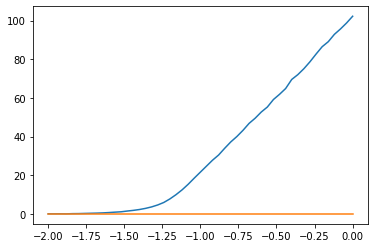

In [25]:
fit_12 = np.polyfit(t_1,data_12,10)
print(np.roots(np.polyder(np.polyder(fit_12)))) # 拐点可能的位置
print(np.dstack((t_1,data_12)))
fit_12_2 = np.polyfit(t[:8],data_12[:8],1) # 切割拐点
fit_12_func = np.poly1d(fit_12)
fit_12_2_func = np.poly1d(fit_12_2)
data_12_fixed = data_12 - fit_12_2_func(t_1) # 修正结果
# plt.scatter(t_1,data_11, c='red', zorder=2.5, s=1)
plt.plot(t_1,data_12_fixed)
plt.plot(t_1,[0]*51)
print(np.dstack((t_1,data_12_fixed)))

[-1.91739891 -1.7638278  -1.55562792 -1.34638894 -0.76679419 -0.45244285
 -0.24815226 -0.08719366]
[[[-1.998e+00 -3.600e+00]
  [-1.960e+00 -3.600e+00]
  [-1.920e+00 -3.500e+00]
  [-1.880e+00 -3.400e+00]
  [-1.840e+00 -3.400e+00]
  [-1.800e+00 -3.400e+00]
  [-1.760e+00 -3.400e+00]
  [-1.720e+00 -3.300e+00]
  [-1.680e+00 -3.300e+00]
  [-1.640e+00 -3.200e+00]
  [-1.600e+00 -3.200e+00]
  [-1.560e+00 -3.100e+00]
  [-1.520e+00 -3.100e+00]
  [-1.480e+00 -3.100e+00]
  [-1.440e+00 -2.900e+00]
  [-1.400e+00 -2.800e+00]
  [-1.360e+00 -2.700e+00]
  [-1.320e+00 -2.500e+00]
  [-1.280e+00 -2.200e+00]
  [-1.240e+00 -2.000e+00]
  [-1.200e+00 -1.500e+00]
  [-1.160e+00 -8.000e-01]
  [-1.120e+00  3.000e-01]
  [-1.080e+00  2.200e+00]
  [-1.040e+00  4.900e+00]
  [-1.000e+00  9.000e+00]
  [-9.600e-01  1.450e+01]
  [-9.200e-01  2.080e+01]
  [-8.800e-01  2.760e+01]
  [-8.400e-01  3.430e+01]
  [-8.000e-01  4.070e+01]
  [-7.600e-01  4.700e+01]
  [-7.200e-01  5.410e+01]
  [-6.800e-01  6.110e+01]
  [-6.400e-01  6.

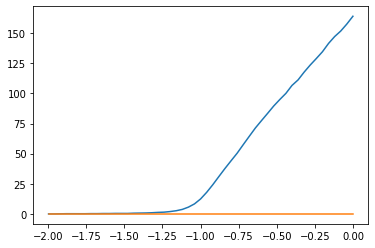

In [26]:
fit_13 = np.polyfit(t_1,data_13,10)
print(np.roots(np.polyder(np.polyder(fit_13)))) # 拐点可能的位置
print(np.dstack((t_1,data_13)))
fit_13_2 = np.polyfit(t[:11],data_13[:11],1) # 切割拐点
fit_13_func = np.poly1d(fit_13)
fit_13_2_func = np.poly1d(fit_13_2)
data_13_fixed = data_13 - fit_13_2_func(t_1) # 修正结果
# plt.scatter(t_1,data_11, c='red', zorder=2.5, s=1)
plt.plot(t_1,data_13_fixed)
plt.plot(t_1,[0]*51)
print(np.dstack((t_1,data_13_fixed)))

[-1.92374396 -1.77110781 -1.56784105 -1.32067881 -1.04986681 -0.79644077
 -0.26384207 -0.09164775]
[[[-1.998 -0.54 ]
  [-1.96  -0.53 ]
  [-1.92  -0.52 ]
  [-1.88  -0.51 ]
  [-1.84  -0.53 ]
  [-1.8   -0.52 ]
  [-1.76  -0.53 ]
  [-1.72  -0.52 ]
  [-1.68  -0.51 ]
  [-1.64  -0.5  ]
  [-1.6   -0.5  ]
  [-1.56  -0.51 ]
  [-1.52  -0.51 ]
  [-1.48  -0.51 ]
  [-1.44  -0.52 ]
  [-1.4   -0.51 ]
  [-1.36  -0.5  ]
  [-1.32  -0.5  ]
  [-1.28  -0.49 ]
  [-1.24  -0.5  ]
  [-1.2   -0.51 ]
  [-1.16  -0.51 ]
  [-1.12  -0.5  ]
  [-1.08  -0.51 ]
  [-1.04  -0.49 ]
  [-1.    -0.49 ]
  [-0.96  -0.48 ]
  [-0.92  -0.48 ]
  [-0.88  -0.47 ]
  [-0.84  -0.48 ]
  [-0.8   -0.48 ]
  [-0.76  -0.48 ]
  [-0.72  -0.46 ]
  [-0.68  -0.44 ]
  [-0.64  -0.42 ]
  [-0.6   -0.35 ]
  [-0.56  -0.21 ]
  [-0.52   0.16 ]
  [-0.48   0.77 ]
  [-0.44   1.55 ]
  [-0.4    2.48 ]
  [-0.36   3.48 ]
  [-0.32   4.59 ]
  [-0.28   5.69 ]
  [-0.24   6.81 ]
  [-0.2    8.06 ]
  [-0.16   9.35 ]
  [-0.12  10.4  ]
  [-0.08  11.05 ]
  [-0.04  12.24 ]
 

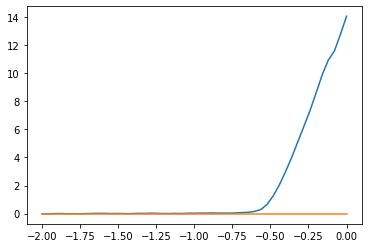

In [27]:
fit_14 = np.polyfit(t_1,data_14,10)
print(np.roots(np.polyder(np.polyder(fit_14)))) # 拐点可能的位置
print(np.dstack((t_1,data_14)))
fit_14_2 = np.polyfit(t[:30],data_14[:30],1) # 切割拐点
fit_14_func = np.poly1d(fit_14)
fit_14_2_func = np.poly1d(fit_14_2)
data_14_fixed = data_14 - fit_14_2_func(t_1) # 修正结果
# plt.scatter(t_1,data_11, c='red', zorder=2.5, s=1)
plt.plot(t_1,data_14_fixed)
plt.plot(t_1,[0]*51)
print(np.dstack((t_1,data_14_fixed)))

In [28]:
(2.00-0.67)/0.04

33.25

[-1.90475738 -1.72637344 -1.49176759 -1.22548567 -0.94102463 -0.67272108
 -0.18249615 -0.02635641]
[[[-1.998 -0.4  ]
  [-1.96  -0.39 ]
  [-1.92  -0.39 ]
  [-1.88  -0.39 ]
  [-1.84  -0.37 ]
  [-1.8   -0.38 ]
  [-1.76  -0.38 ]
  [-1.72  -0.37 ]
  [-1.68  -0.38 ]
  [-1.64  -0.39 ]
  [-1.6   -0.39 ]
  [-1.56  -0.38 ]
  [-1.52  -0.39 ]
  [-1.48  -0.38 ]
  [-1.44  -0.37 ]
  [-1.4   -0.37 ]
  [-1.36  -0.37 ]
  [-1.32  -0.38 ]
  [-1.28  -0.38 ]
  [-1.24  -0.39 ]
  [-1.2   -0.38 ]
  [-1.16  -0.36 ]
  [-1.12  -0.36 ]
  [-1.08  -0.34 ]
  [-1.04  -0.36 ]
  [-1.    -0.35 ]
  [-0.96  -0.35 ]
  [-0.92  -0.36 ]
  [-0.88  -0.36 ]
  [-0.84  -0.35 ]
  [-0.8   -0.36 ]
  [-0.76  -0.36 ]
  [-0.72  -0.35 ]
  [-0.68  -0.34 ]
  [-0.64  -0.33 ]
  [-0.6   -0.32 ]
  [-0.56  -0.32 ]
  [-0.52  -0.31 ]
  [-0.48  -0.24 ]
  [-0.44  -0.09 ]
  [-0.4    0.19 ]
  [-0.36   0.6  ]
  [-0.32   1.24 ]
  [-0.28   1.99 ]
  [-0.24   2.85 ]
  [-0.2    3.65 ]
  [-0.16   4.48 ]
  [-0.12   5.32 ]
  [-0.08   5.87 ]
  [-0.04   6.82 ]
 

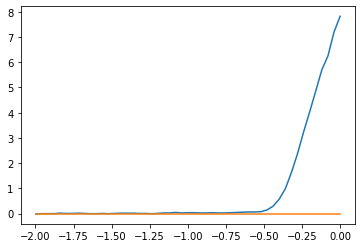

In [29]:
fit_15 = np.polyfit(t_1,data_15,10)
print(np.roots(np.polyder(np.polyder(fit_15)))) # 拐点可能的位置
print(np.dstack((t_1,data_15)))
fit_15_2 = np.polyfit(t[:33],data_15[:33],1) # 切割拐点
fit_15_func = np.poly1d(fit_15)
fit_15_2_func = np.poly1d(fit_15_2)
data_15_fixed = data_15 - fit_15_2_func(t_1) # 修正结果
# plt.scatter(t_1,data_11, c='red', zorder=2.5, s=1)
plt.plot(t_1,data_15_fixed)
plt.plot(t_1,[0]*51)
print(np.dstack((t_1,data_15_fixed)))

In [30]:
x_s = np.array([8.214, 7.408, 6.879, 5.480, 5.196])
y_s = np.array([1.896,1.786,1.447,0.787,0.751])

[ 0.4172491  -1.43521466]


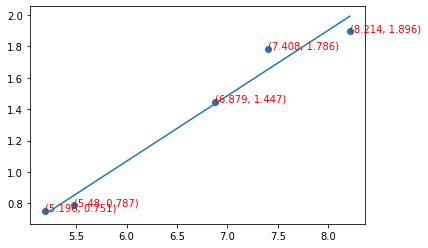

In [31]:
p = np.polyfit(x_s, y_s, 1)
print(p)
plt.scatter(x_s, y_s)
plt.plot(x_s, x_s * p[0] + p[1])
for i in range(len(x_s)):
    plt.text(x_s[i], y_s[i], ((x_s[i] * 1000) // 1 / 1000, (y_s[i] * 1000) // 1 / 1000),
             color='red')

In [ ]:
0.4172491 * 1.602176634

In [ ]:
(6.62607015 - 6.685067585775294 )/ 6.62607015

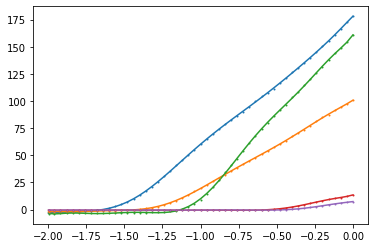

In [40]:
plt.scatter(t_1,data_11, zorder=2.5, s=1)
plt.scatter(t_1,data_12, zorder=2.5, s=1)
plt.scatter(t_1,data_13, zorder=2.5, s=1)
plt.scatter(t_1,data_14, zorder=2.5, s=1)
plt.scatter(t_1,data_15, zorder=2.5, s=1)
plt.plot(t_1,fit_11_func(t_1))
plt.plot(t_1,fit_12_func(t_1))
plt.plot(t_1,fit_13_func(t_1))
plt.plot(t_1,fit_14_func(t_1))
plt.plot(t_1,fit_15_func(t_1))
plt.savefig('export9.jpg', bbox_inches='tight', dpi=2000)

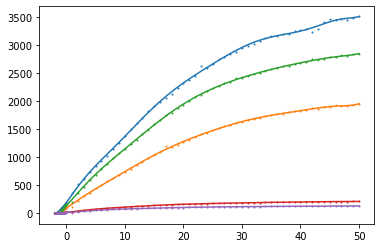

In [39]:
fit_1 = np.polyfit(t,data_1,10)
fit_1_func = np.poly1d(fit_1)
fit_2 = np.polyfit(t,data_2,10)
fit_2_func = np.poly1d(fit_2)
fit_3 = np.polyfit(t,data_3,10)
fit_3_func = np.poly1d(fit_3)
fit_4 = np.polyfit(t,data_4,10)
fit_4_func = np.poly1d(fit_4)
fit_5 = np.polyfit(t,data_5,10)
fit_5_func = np.poly1d(fit_5)
plt.scatter(t,data_1, zorder=2.5, s=1)
plt.scatter(t,data_2, zorder=2.5, s=1)
plt.scatter(t,data_3, zorder=2.5, s=1)
plt.scatter(t,data_4, zorder=2.5, s=1)
plt.scatter(t,data_5, zorder=2.5, s=1)
plt.plot(t,fit_1_func(t))
plt.plot(t,fit_2_func(t))
plt.plot(t,fit_3_func(t))
plt.plot(t,fit_4_func(t))
plt.plot(t,fit_5_func(t))
plt.savefig('export8.jpg', bbox_inches='tight', dpi=2000)